In [193]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import datetime as dt

In [194]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
%autoreload 2

## Get emoncms feeds

In [196]:
import emoncmsfeed as getfeeds

In [197]:
dataframefreq = '10min'

feeds =  { 'T_ext':2, 'T_int':3 }

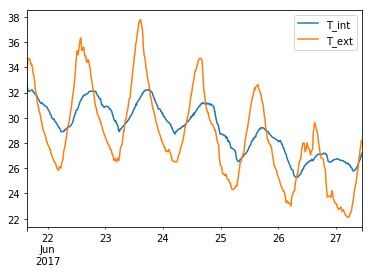

In [198]:
df = getfeeds.builddataframe( feeds, dataframefreq )
df.plot();

## Get weather

In [199]:
import weatherfeed as wf

In [200]:
coords_grenoble = (45.1973288, 5.7139923) #(45.1973288, 5.7103223)

In [201]:
df.index[-1]

Timestamp('2017-06-27 10:50:00', freq='10T')

In [202]:
startday, lastday = df.index[0], df.index[-1]

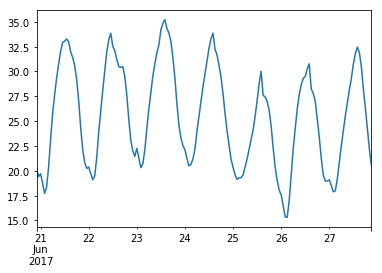

In [203]:
allweatherdata = wf.buildmultidayDF(startday, lastday, coords_grenoble )

allweatherdata['temperature'].plot()

In [204]:
allweatherdata = allweatherdata.resample(dataframefreq).interpolate()

In [205]:
alldata = pd.concat( [df, allweatherdata ], axis=1 )

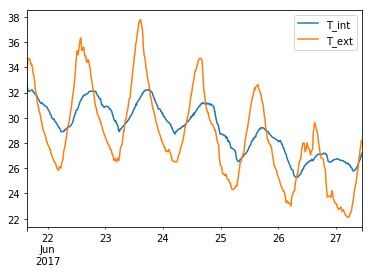

In [206]:
df.plot()

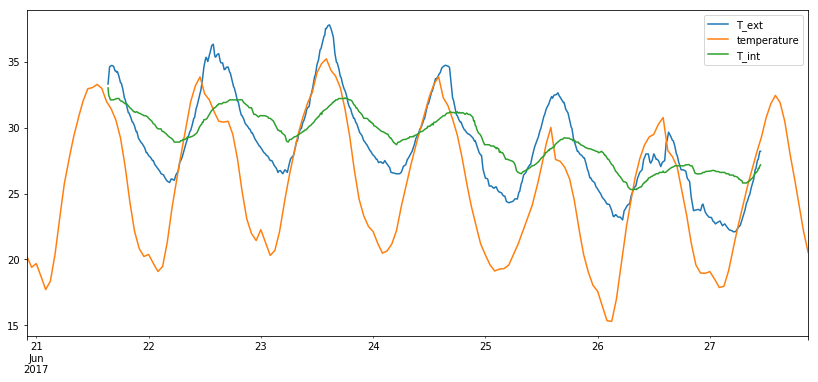

In [207]:
alldata[['T_ext', 'temperature', 'T_int']].plot(figsize=(14, 6))

In [208]:
alldata.columns

Index(['T_int', 'T_ext', 'apparentTemperature', 'cloudCover',
       'precipIntensity', 'temperature', 'windBearing', 'windSpeed'],
      dtype='object')

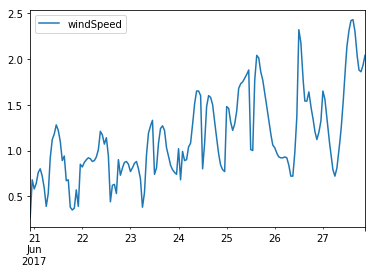

In [209]:
alldata[['windSpeed']].plot()

### Sun irradiation

In [210]:
import sunradiation as sun

In [211]:
d = dt.datetime(2017, 6, 22, 11, 0, 0, 0)
sigma = 37
phi_C = 50

F = sun.get_flux_surface( coords_grenoble, d, sigma, phi_C )
print( F )

814.1840171073205


/home/etienne/Projets/thermique_appart/py3/lib/python3.5/site-packages/pysolar/time.py:105: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


In [212]:
sigma_bastille = 37   # deg, angle du toit coté bastille
phi_C_bastille = 50 # deg, azimuth du toit

Flux_bastille = [ sun.get_flux_surface( coords_grenoble, d, sigma_bastille, phi_C_bastille ) \
                 for d in alldata.index ]

/home/etienne/Projets/thermique_appart/py3/lib/python3.5/site-packages/pysolar/time.py:105: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


In [213]:
alldata['Flux_bastille'] = Flux_bastille*alldata['cloudCover']

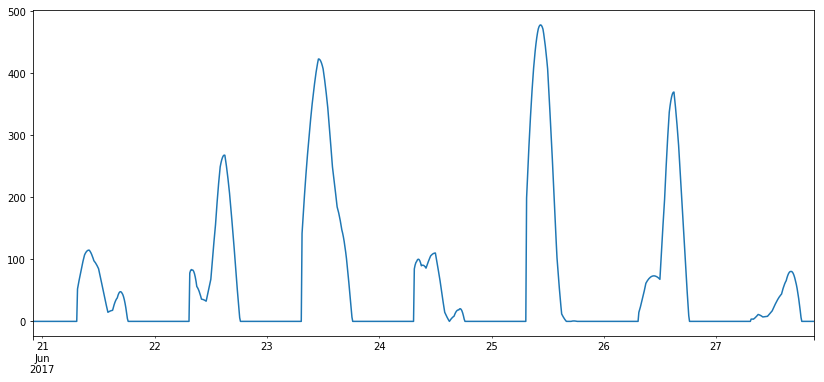

In [214]:
alldata['Flux_bastille'].plot(figsize=(14, 6))